| CSV         | Description                                                                                           | Source                                         |
|-------------|-----------------------------------------------------------------------------------------------------|------------------------------------------------|
| **ACC_001**     | Tri-axial accelerometry (X-Y-Z)                                                              | Empatica E4 wrist-worn device                  |
| **BVP_001**     | Blood volume pulse                                                                              | Empatica E4 wrist-worn device                  |
| **Dexcom_001**  | Interstitial glucose concentration (mg/dL)                                                     | Dexcom G6, a continuous glucose monitor system |
| **EDA_001**     | Electrodermal activity                                                                         | Empatica E4 wrist-worn device                  |
| **HR_001_new**  | Heart Rate                                                                                    | Empatica E4 wrist-worn device                  |
| **IBI_001**     | Interbeat interval                                                                             | Empatica E4 wrist-worn device                  |
| **TEMP_001**    | Skin Temperature                                                                               | Empatica E4 wrist-worn device                  |
<br> 

### There are 7 csv's which will give us 9 features (3 from tri-axial accelerometry)

<br>
<br>
<br>

## Data Wrangling:

**Step 1:** Import necessary libraries, imported CSVs and stored each as a separate DataFrame within a dictionary

**Step 2:** Removed blank space, renamed a column in Dexcom, and converted all 'datetime' columns to datetime

**Step 3:** Confirmed data is in datetime and float64 format, no missing values except in Dexcom_001 

**Step 4:** Cleaned Dexcom_001 df of unnecessary rows and columns

**Step 5:** Set 'datetime' column as index of all dfs in the dictionary

**Step 6:** Printed mean sampling period, median sampling period, # of samples, start time, and end time of each df.

<br>
<br>
<br>

## Question1: How to handle different sampling periods, number of samples, start and end times?  Focus variable is 'Dexcom_001'

| DataFrame   | Mean Sampling Period | Median Sampling Period | Number of Samples | Start Time                | End Time                  |
|-------------|----------------------|------------------------|-------------------|---------------------------|---------------------------|
| ACC_001     | 0.038747 seconds     | 0.03125 seconds        | 20296428          | 2020-02-13 15:28:50       | 2020-02-22 17:56:03.843750|
| BVP_001     | 0.019373 seconds     | 0.015625 seconds       | 40592838          | 2020-02-13 15:28:50       | 2020-02-22 17:56:03.781250|
| Dexcom_001  | 304.449609 seconds   | 300.0 seconds          | 2561              | 2020-02-13 17:23:32       | 2020-02-22 17:53:23       |
| EDA_001     | 0.30998 seconds      | 0.25 seconds           | 2537046           | 2020-02-13 15:28:50       | 2020-02-22 17:56:03.250000|
| HR_001_new  | 1.240044 seconds     | 0.0 seconds            | 634188            | 2020-02-13 15:29:00       | 2020-02-22 17:56:00       |
| IBI_001     | 2.950438 seconds     | 0.98442 seconds        | 266366            | 2020-02-13 15:33:22.059328| 2020-02-22 17:51:35.691598|
| TEMP_001    | 0.30998 seconds      | 0.25 seconds           | 2537040           | 2020-02-13 15:28:50       | 2020-02-22 17:56:03.750000|

<br>
<br>
<br>

## Question 2: Should I interpolate values for glucose readings?  Current sampling is every 5 minutes but it appears 'smooth' so I may be able to get more data by interpolating in 1 minute intervals. I worry that I'll be 'creating' data that was not directly collected. Maybe in my training set I do this but not on the test set?

<br>
<br>
<br>

## Question 3: How to incorporate food log - where food entry includes information like (calorie, total carb, fiber, sugar, protein, fat) but is only ~4 times a day?



In [155]:
# Importing necessary libraries
import pandas as pd
from pandas import to_datetime
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# Filepaths in the local directory
filepaths = ['Data/001/ACC_001.csv', 'Data/001/BVP_001.csv', 'Data/001/Dexcom_001.csv', 'Data/001/EDA_001.csv', 'Data/001/HR_001_new.csv', 'Data/001/IBI_001.csv', 'Data/001/TEMP_001.csv']

# Dictionary to store the dataframes
dfs = {}

for csv in filepaths:
    key = csv.split('/')[-1].split('.')[0]  # Get the filename without the extension
    dfs[key] = pd.read_csv(csv)  # Read the csv file and store the DataFrame in the dictionary

In [157]:
# Display the DFs and respective columns within the dictionary
for key, df in dfs.items():
    print(f"DataFrame: {key}")
    print("Columns:", df.columns.tolist())
    print()

DataFrame: ACC_001
Columns: ['datetime', ' acc_x', ' acc_y', ' acc_z']

DataFrame: BVP_001
Columns: ['datetime', ' bvp']

DataFrame: Dexcom_001
Columns: ['Index', 'Timestamp (YYYY-MM-DDThh:mm:ss)', 'Event Type', 'Event Subtype', 'Patient Info', 'Device Info', 'Source Device ID', 'Glucose Value (mg/dL)', 'Insulin Value (u)', 'Carb Value (grams)', 'Duration (hh:mm:ss)', 'Glucose Rate of Change (mg/dL/min)', 'Transmitter Time (Long Integer)']

DataFrame: EDA_001
Columns: ['datetime', ' eda']

DataFrame: HR_001_new
Columns: ['datetime', ' hr']

DataFrame: IBI_001
Columns: ['datetime', ' ibi']

DataFrame: TEMP_001
Columns: ['datetime', ' temp']



## Looks good, let's do a few things to clean up the data:
- Remove blank space ' ' infront of several of the column names.
- Rename the column in Dexcom_001 to 'datetime'.
- Convert the 'datetime' columns in to datetime.

In [158]:
# Remove leading/trailing spaces from column names
for key, df in dfs.items():
    df.columns = df.columns.str.strip()

# Rename the column 'Timestamp ...' in Dexcom_001 to 'datetime'
dfs['Dexcom_001'] = dfs['Dexcom_001'].rename(columns={'Timestamp (YYYY-MM-DDThh:mm:ss)': 'datetime'})

# Convert 'datetime' columns in to datetime
for key in dfs.keys():
    if 'datetime' in dfs[key].columns:
        dfs[key]['datetime'] = pd.to_datetime(dfs[key]['datetime'])
        
# Display the DFs and respective columns within the dictionary
for key, df in dfs.items():
    print(f"DataFrame: {key}")
    print("Columns:", df.columns.tolist())
    print()

/var/folders/mn/5t8x6ck57719dt2pg7h0_xl40000gn/T/ipykernel_15709/2727465161.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfs[key]['datetime'] = pd.to_datetime(dfs[key]['datetime'])


DataFrame: ACC_001
Columns: ['datetime', 'acc_x', 'acc_y', 'acc_z']

DataFrame: BVP_001
Columns: ['datetime', 'bvp']

DataFrame: Dexcom_001
Columns: ['Index', 'datetime', 'Event Type', 'Event Subtype', 'Patient Info', 'Device Info', 'Source Device ID', 'Glucose Value (mg/dL)', 'Insulin Value (u)', 'Carb Value (grams)', 'Duration (hh:mm:ss)', 'Glucose Rate of Change (mg/dL/min)', 'Transmitter Time (Long Integer)']

DataFrame: EDA_001
Columns: ['datetime', 'eda']

DataFrame: HR_001_new
Columns: ['datetime', 'hr']

DataFrame: IBI_001
Columns: ['datetime', 'ibi']

DataFrame: TEMP_001
Columns: ['datetime', 'temp']



In [159]:
# Output the info and missing values of each DataFrame
for key, df in dfs.items():
    print(f"--- {key} ---")
    print("\nInfo:")
    print(df.info())
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\n")

--- ACC_001 ---

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20296428 entries, 0 to 20296427
Data columns (total 4 columns):
 #   Column    Dtype         
---  ------    -----         
 0   datetime  datetime64[ns]
 1   acc_x     float64       
 2   acc_y     float64       
 3   acc_z     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 619.4 MB
None

Missing values:
datetime    0
acc_x       0
acc_y       0
acc_z       0
dtype: int64


--- BVP_001 ---

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40592838 entries, 0 to 40592837
Data columns (total 2 columns):
 #   Column    Dtype         
---  ------    -----         
 0   datetime  datetime64[ns]
 1   bvp       float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 619.4 MB
None

Missing values:
datetime    0
bvp         0
dtype: int64


--- Dexcom_001 ---

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 13 columns):
 #   Column  

## Columns of interest are in float64 format, Datetime columns are in datetime64. Most DFs also have 0 missing values. 
- Dexcom_001 is very mixed. Lots of columns that we do not need, and lots of missing values. Let's investigate further

In [160]:
# Observe columns
print(dfs['Dexcom_001'].columns)

# Observe missing information
print(dfs['Dexcom_001'].info())

# See the first 20 rows
print(dfs['Dexcom_001'].head(20))

Index(['Index', 'datetime', 'Event Type', 'Event Subtype', 'Patient Info',
       'Device Info', 'Source Device ID', 'Glucose Value (mg/dL)',
       'Insulin Value (u)', 'Carb Value (grams)', 'Duration (hh:mm:ss)',
       'Glucose Rate of Change (mg/dL/min)',
       'Transmitter Time (Long Integer)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Index                               2573 non-null   int64         
 1   datetime                            2561 non-null   datetime64[ns]
 2   Event Type                          2573 non-null   object        
 3   Event Subtype                       7 non-null      object        
 4   Patient Info                        4 non-null      object        
 5   Device Info                         1 non-null      object 

## Dexcom_001 needs work. We see that the first 12 rows are just informational and almost all of the columns should be removed. Let's do the following: 
- Remove 'index', 'Event Type', 'Event Subtype', 'Device Info', 'Source Device ID', Insulin Value', 'Carb Value', 'Duration', 'Gluccose Rate of Change', and 'Tarnsmitting Time'
- Remove rows where 'datetime' is null/NaN

In [161]:
#Removing all columns in Dexcom_001 except for Glucose Value and datetime.
dfs['Dexcom_001'] = dfs['Dexcom_001'][['datetime', 'Glucose Value (mg/dL)']]

# Remove rows where 'datetime' is null/NaN (the first twelve rows)
dfs['Dexcom_001'].dropna(subset=['datetime'], inplace=True)

# Verify that the missing 'datetime' rows were removed from 'Dexcom_001'
print(dfs['Dexcom_001'].isnull().sum())
# Observe missing information
print(dfs['Dexcom_001'].info())

datetime                 0
Glucose Value (mg/dL)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 2561 entries, 12 to 2572
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   datetime               2561 non-null   datetime64[ns]
 1   Glucose Value (mg/dL)  2561 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.0 KB
None


In [162]:
# Set 'datetime' column as index
for df in dfs.values():
    df.set_index('datetime', inplace=True)

In [163]:
for key, df in dfs.items():
    # Calculate time delta series
    timedelta_series = df.index.to_series().diff()

    # Compute mean/median of timedelta_series in seconds
    mean_sampling_period_seconds = timedelta_series.mean().total_seconds()
    median_sampling_period_seconds = timedelta_series.median().total_seconds()

    # Count the number of samples
    num_samples = len(df)

    # Get the start time and end time
    start_time = df.index.min()
    end_time = df.index.max()

    print(f"For DataFrame '{key}', mean sampling period is {mean_sampling_period_seconds} seconds, \
          median sampling period is {median_sampling_period_seconds} seconds,\
          there are {num_samples} samples,\
          start time is {start_time}, and end time is {end_time}.\n")


For DataFrame 'ACC_001', mean sampling period is 0.038747 seconds,           median sampling period is 0.03125 seconds,          there are 20296428 samples,          start time is 2020-02-13 15:28:50, and end time is 2020-02-22 17:56:03.843750.

For DataFrame 'BVP_001', mean sampling period is 0.019373 seconds,           median sampling period is 0.015625 seconds,          there are 40592838 samples,          start time is 2020-02-13 15:28:50, and end time is 2020-02-22 17:56:03.781250.

For DataFrame 'Dexcom_001', mean sampling period is 304.449609 seconds,           median sampling period is 300.0 seconds,          there are 2561 samples,          start time is 2020-02-13 17:23:32, and end time is 2020-02-22 17:53:23.

For DataFrame 'EDA_001', mean sampling period is 0.30998 seconds,           median sampling period is 0.25 seconds,          there are 2537046 samples,          start time is 2020-02-13 15:28:50, and end time is 2020-02-22 17:56:03.250000.

For DataFrame 'HR_001_new', 

# Question: How should I go ahead with EDA? 
- Dexcom_001 and it's 'Glucose Value' is my target feature
- But it has by far the longest sampling period, and fewest samples (300s vs 3/100th of a second). 
- Should I do outlier detection and any imputation or interpoloation on each DF separately?  Or first do an outer join and go from there? 
- How to handle the different sampling rates along with gaps in data collection? 

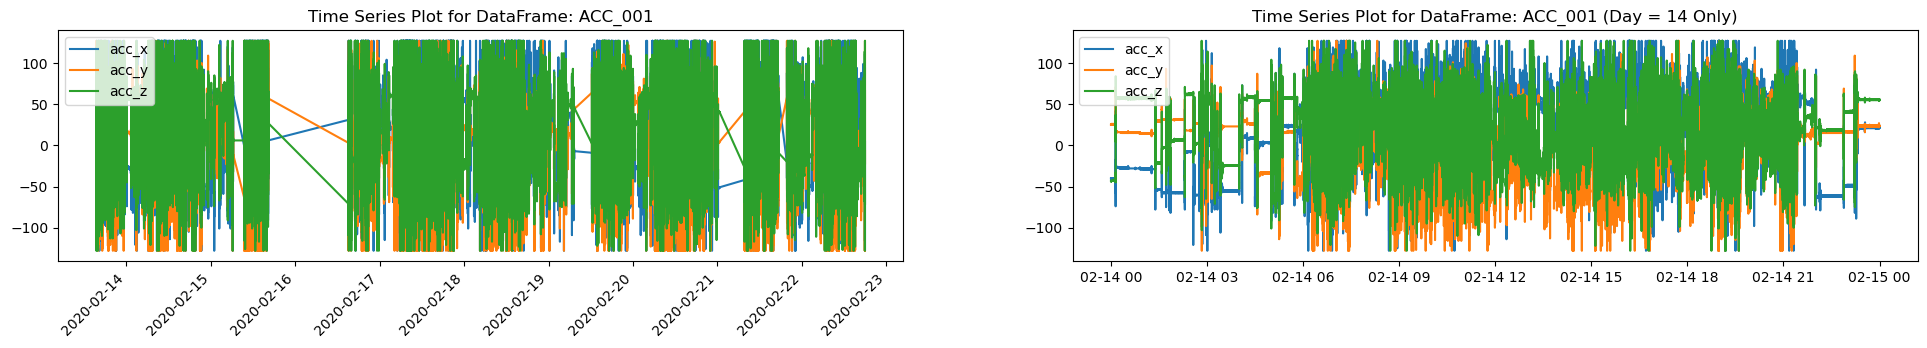

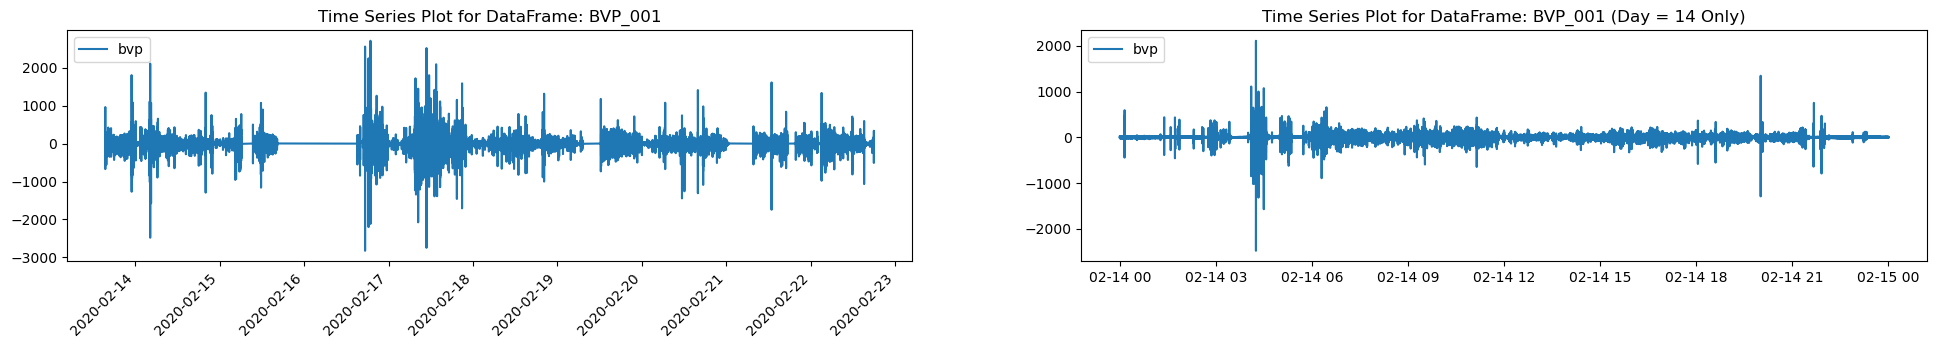

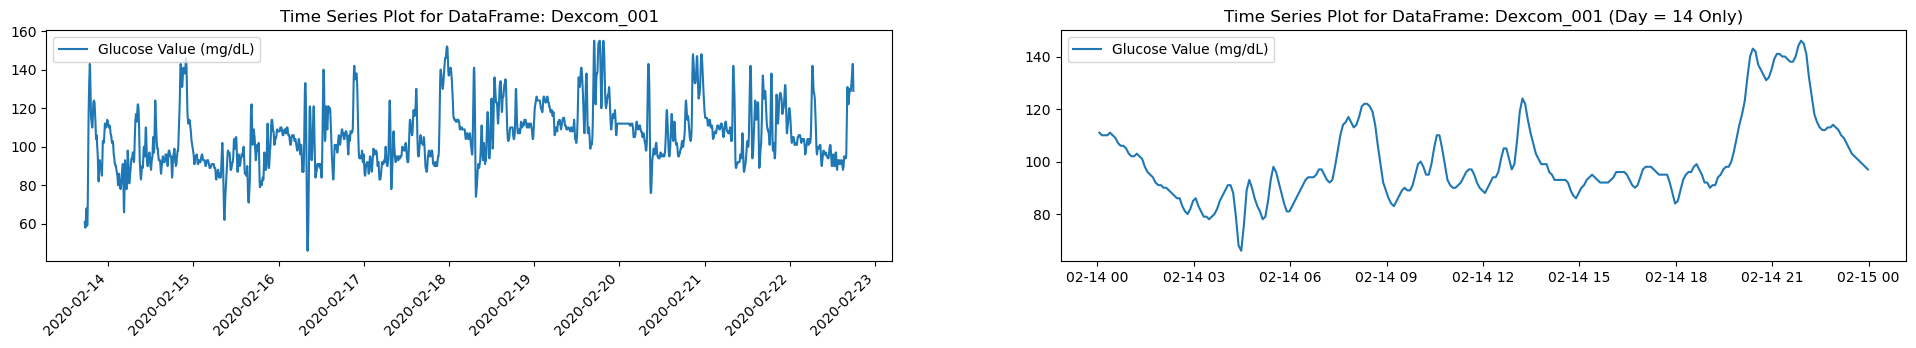

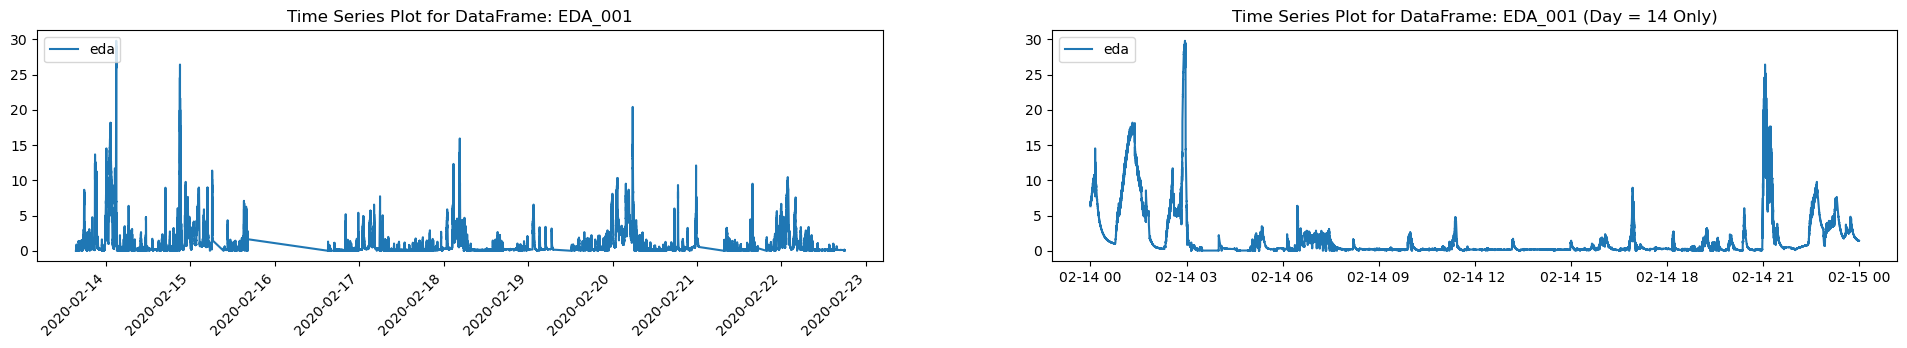

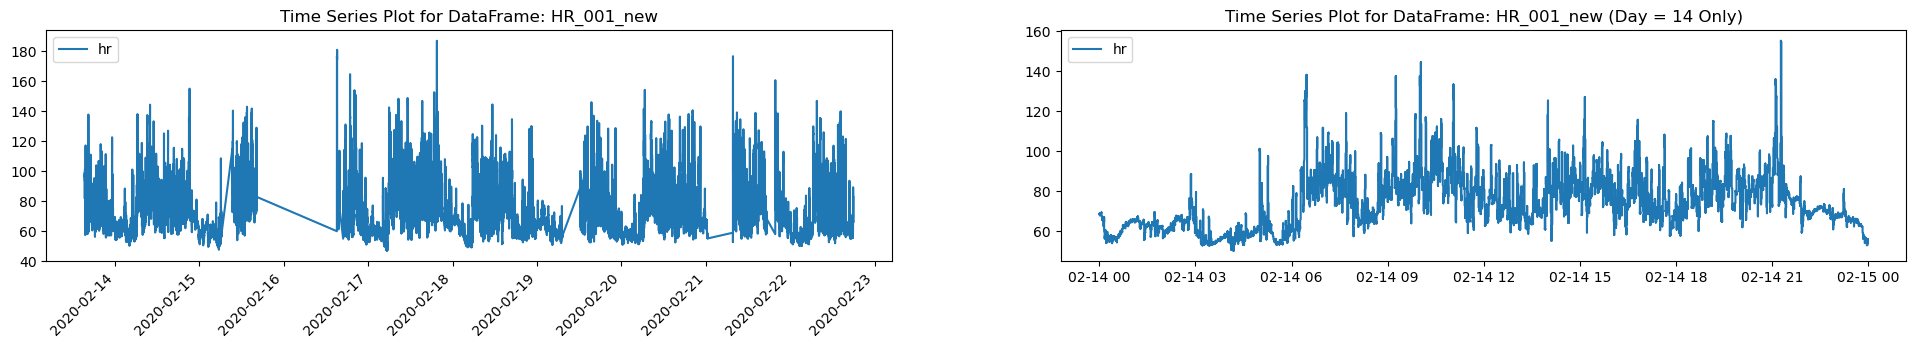

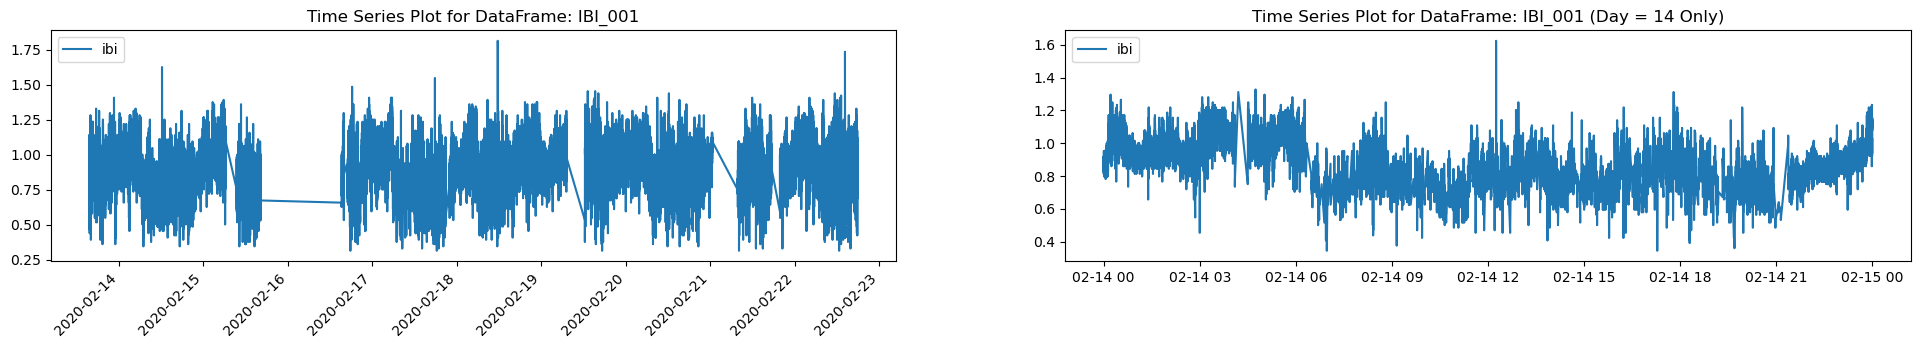

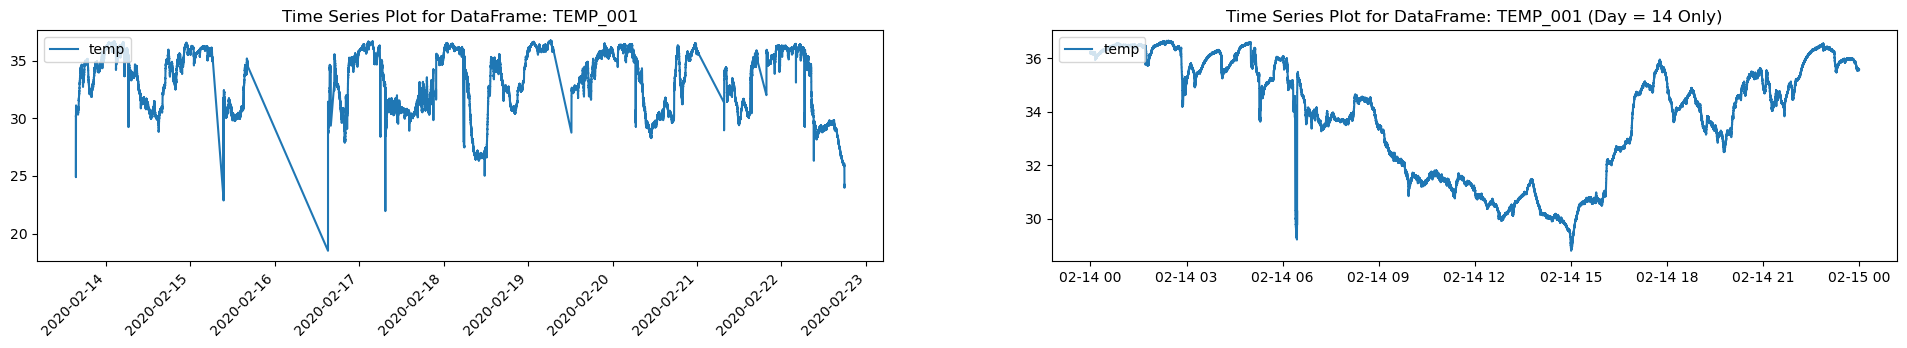

In [164]:
for key, df in dfs.items():
    # First plot: All data
    fig, ax = plt.subplots(1, 2, figsize=(24, 3))

    for col in df.columns:
        ax[0].plot(df[col], label=col)
        
    # Rotate x-axis labels
    labels = ax[0].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='right')

    ax[0].set_title(f'Time Series Plot for DataFrame: {key}')
    ax[0].legend(loc='upper left')

    # Second plot: Specific day (day = 14)
    selected_rows = df[df.index.day == 14]
    for col in selected_rows.columns:
        ax[1].plot(selected_rows[col], label=col)

    ax[1].set_title(f'Time Series Plot for DataFrame: {key} (Day = 14 Only)')
    ax[1].legend(loc='upper left')

    plt.show()

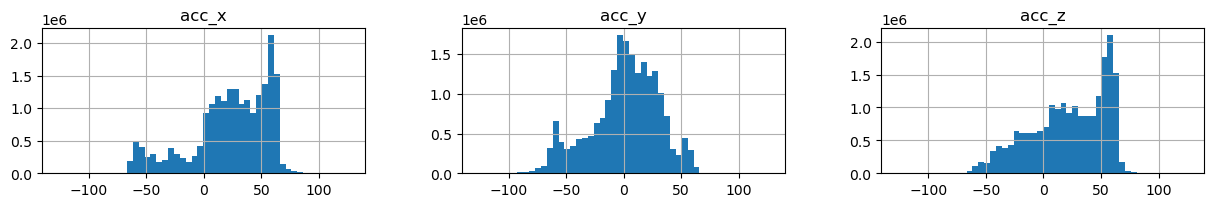

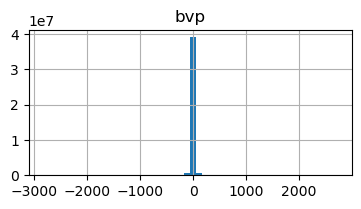

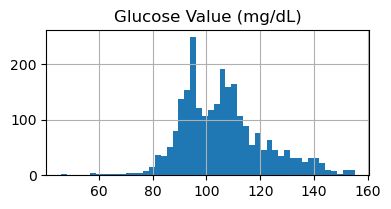

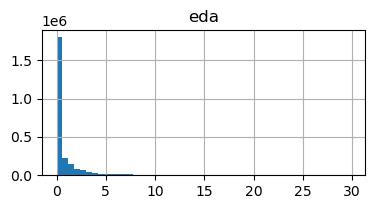

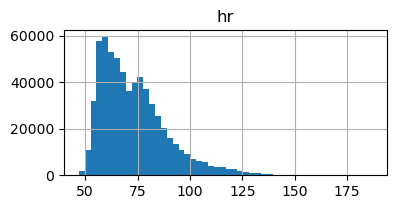

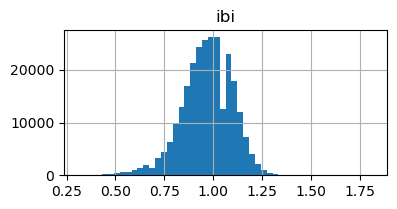

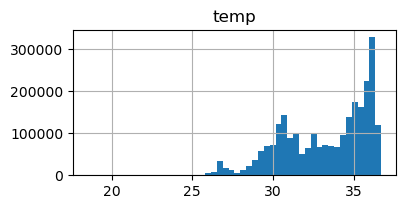

In [165]:

for key, df in dfs.items():
    df.hist(bins=50, figsize=(15, 5), layout=(1, 3))
    plt.subplots_adjust(top=0.4, hspace=0.3)
    plt.show()

# Observations from time series graph and histograms:
- There are 3 gaps in data collection for most features. The largest gap is ~24 hours.  
- The data looks mostly clean. A moving average to 'smooth' would be helpful
- From the Histograms it doesn't appear there are any major outliers to be worried about. 

In [166]:
# Initialize an empty DataFrame
df_all = pd.DataFrame()

# Perform an outer join on all the DataFrames in the dictionary
for key, df in dfs.items():
    df_all = df_all.join(df, how='outer')

# Create a new list of column names
cols = df_all.columns.tolist()
cols.insert(0, cols.pop(cols.index('Glucose Value (mg/dL)')))

# Use the new list of column names to reorder the columns 
df_all = df_all[cols]

# Rename the column 'Glucose Value (mg/dL)' to 'Glucose'
df_all.rename(columns={'Glucose Value (mg/dL)': 'Glucose'}, inplace=True)

# Change 'index' to your time column if it's not the index
df_all.index = pd.to_datetime(df_all.index)

# Resample to 1-minute averages
df_resampled = df_all.resample('5min').mean()

In [167]:
# Identify min and max timestamp for non-NaN Glucose values
min_time = df_resampled.loc[df_resampled['Glucose'].notna()].index.min()
max_time = df_resampled.loc[df_resampled['Glucose'].notna()].index.max()

print(min_time)
print(max_time)

# Filter out rows outside this time range
df_resampled = df_resampled[(df_resampled.index >= min_time) & (df_resampled.index <= max_time)]

2020-02-13 17:20:00
2020-02-22 17:50:00


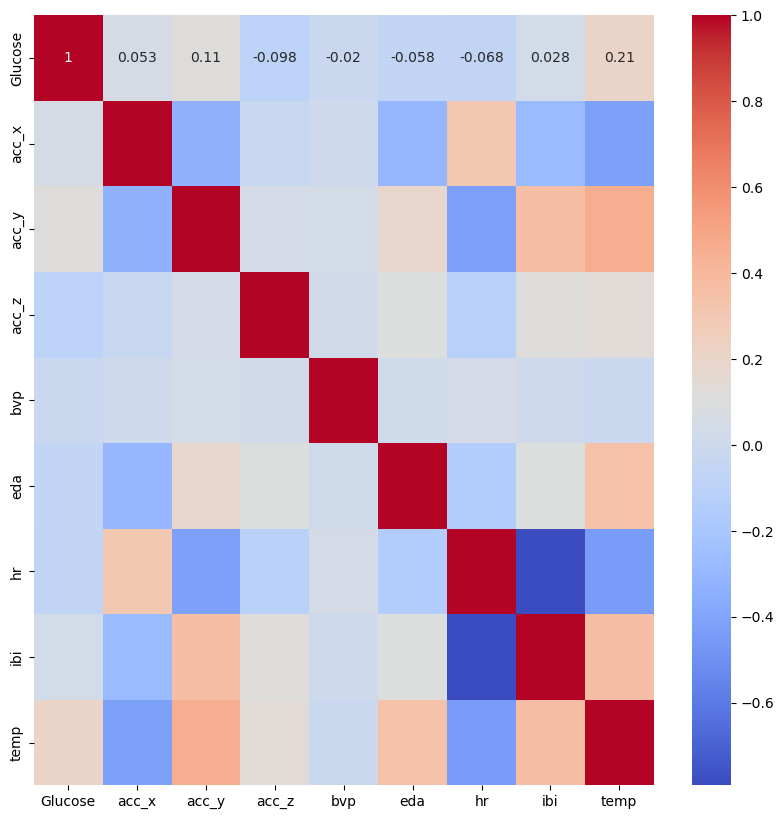

In [168]:
# Compute the correlation matrix
corr_matrix_resampled = df_resampled.corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix_resampled, annot=True, cmap='coolwarm')
plt.show()

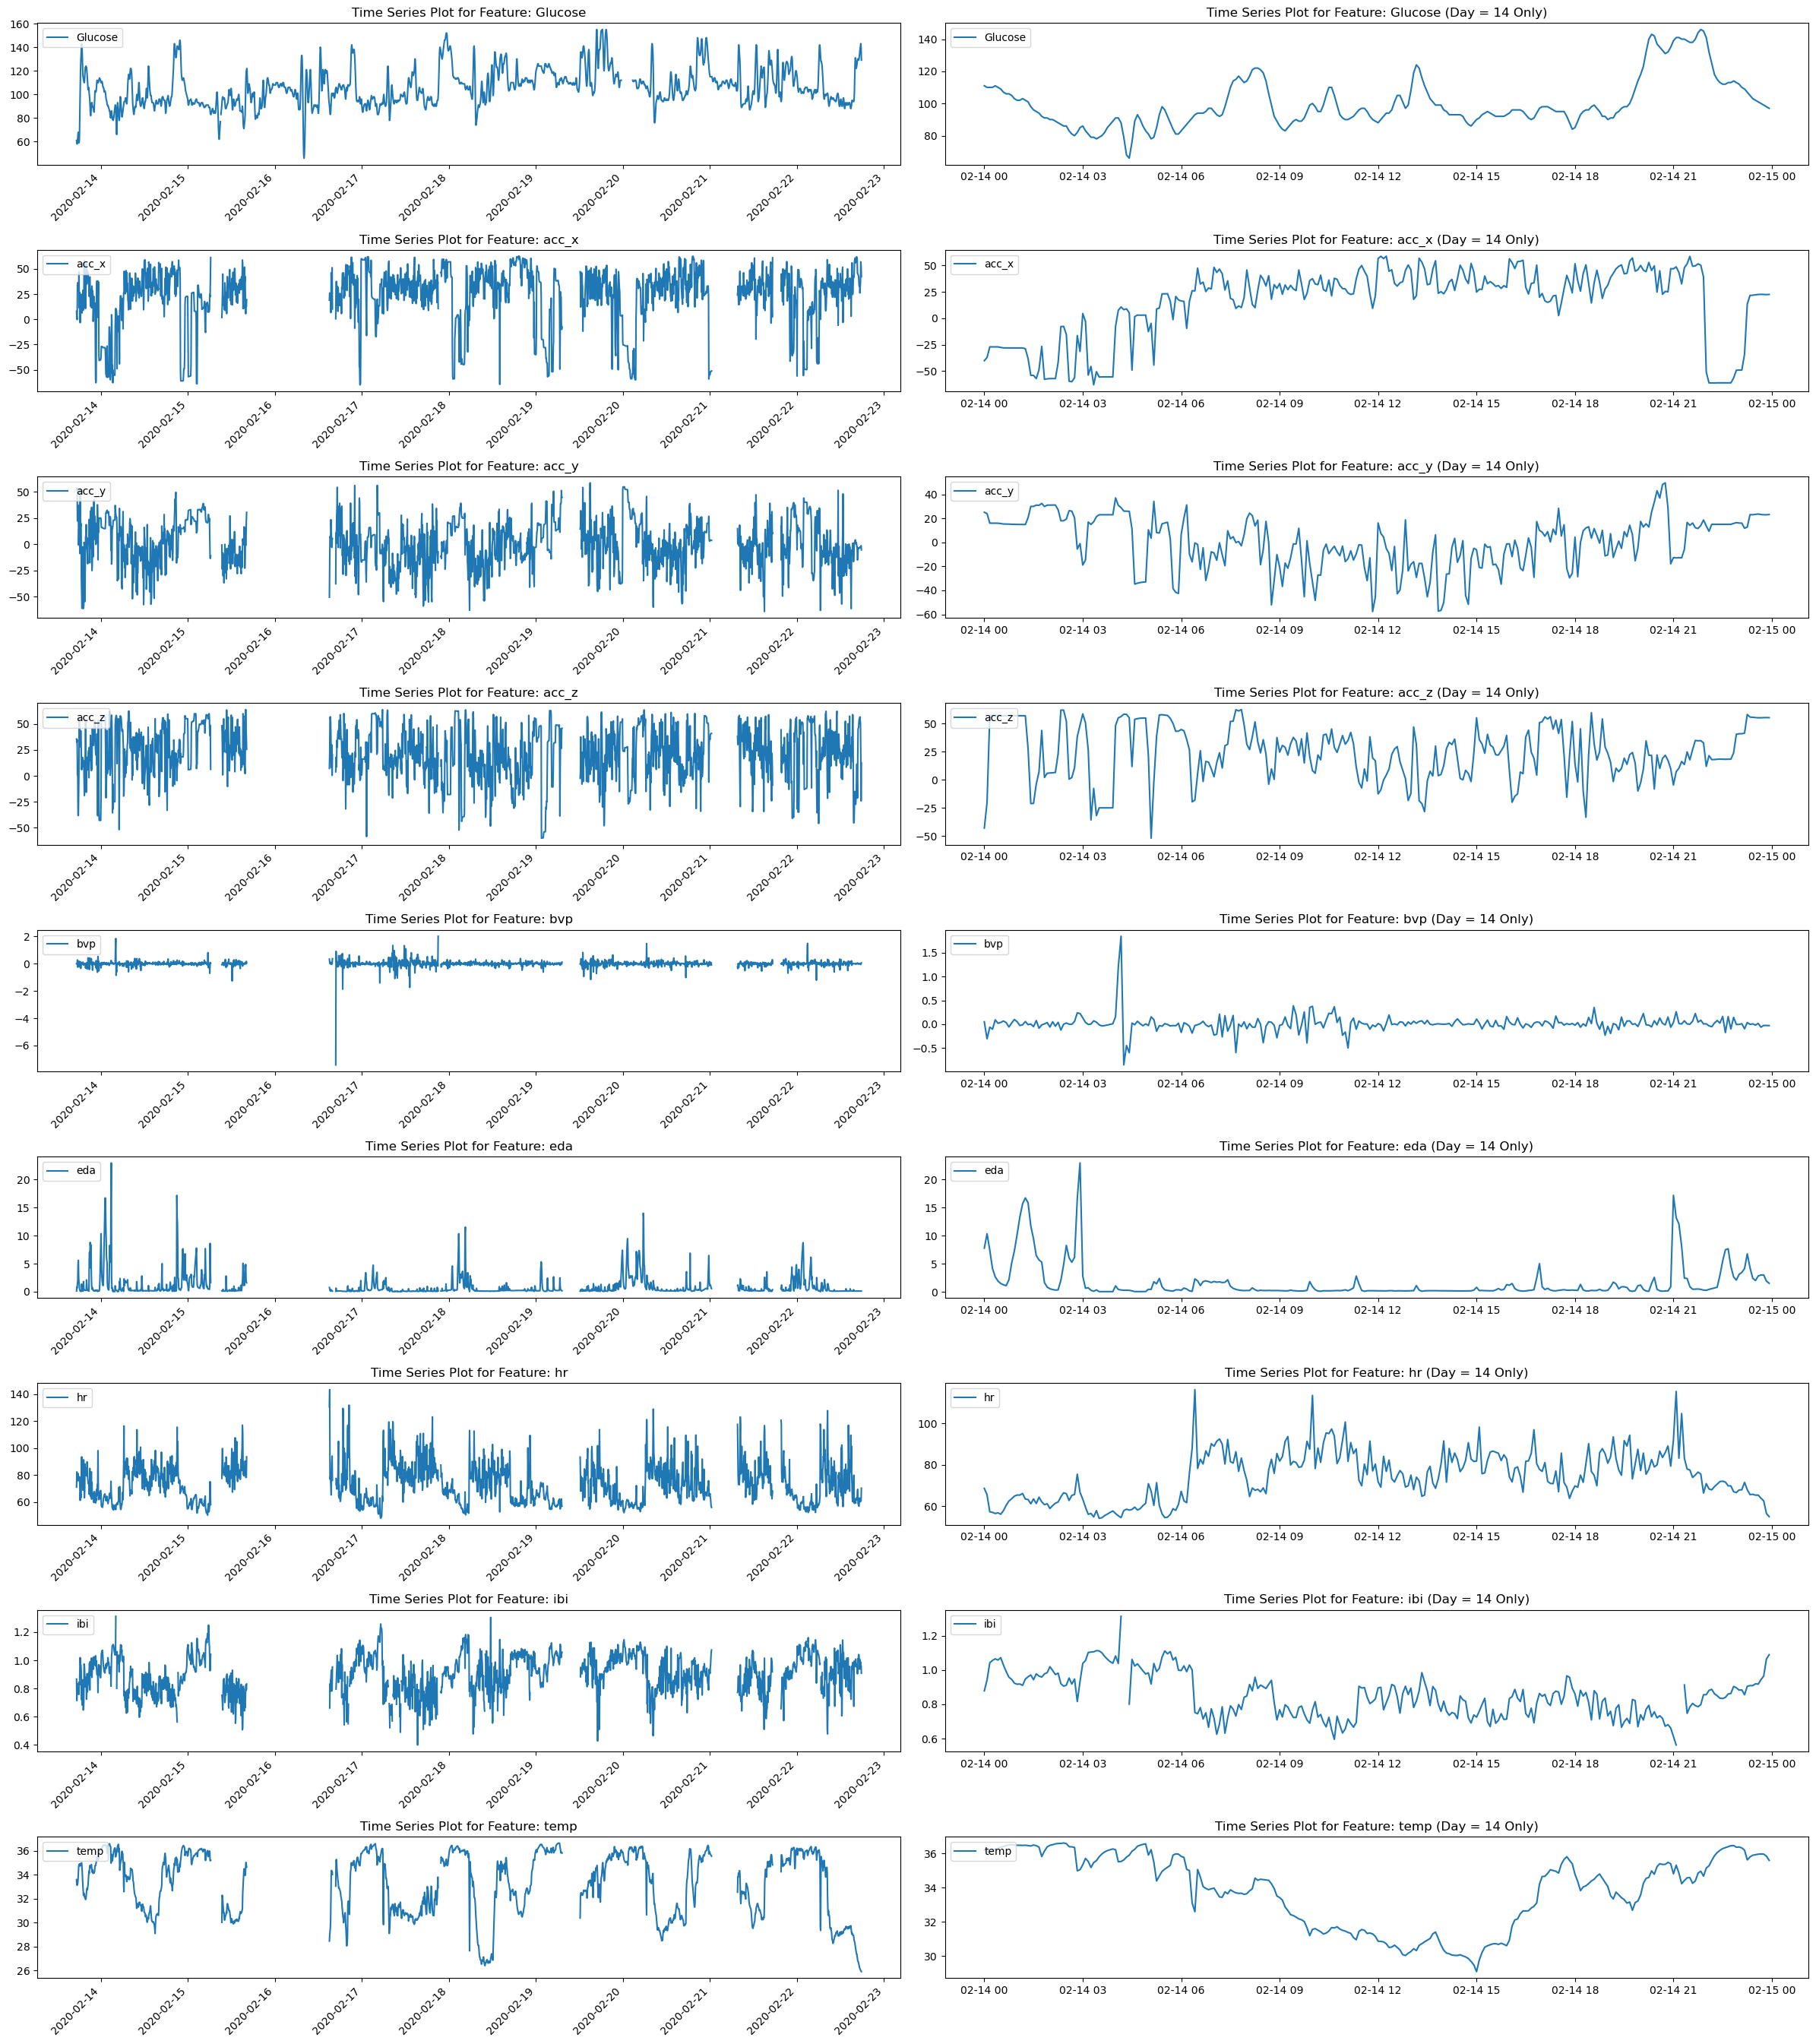

In [169]:
fig, ax = plt.subplots(len(df_resampled.columns), 2, figsize=(24, 3 * len(df_resampled.columns)))

# Loop over each feature
for i, col in enumerate(df_resampled.columns):
    # First plot: All data
    ax[i, 0].plot(df_resampled.index, df_resampled[col], label=col)

    # Rotate x-axis labels
    labels = ax[i, 0].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='right')

    ax[i, 0].set_title(f'Time Series Plot for Feature: {col}')
    ax[i, 0].legend(loc='upper left')

    # Second plot: Specific day (day = 14)
    selected_rows = df_resampled[df_resampled.index.day == 14]
    ax[i, 1].plot(selected_rows.index, selected_rows[col], label=col)

    ax[i, 1].set_title(f'Time Series Plot for Feature: {col} (Day = 14 Only)')
    ax[i, 1].legend(loc='upper left')

plt.tight_layout()
plt.show()


# Feature Engineering: 
- Norm x+y+z
- 

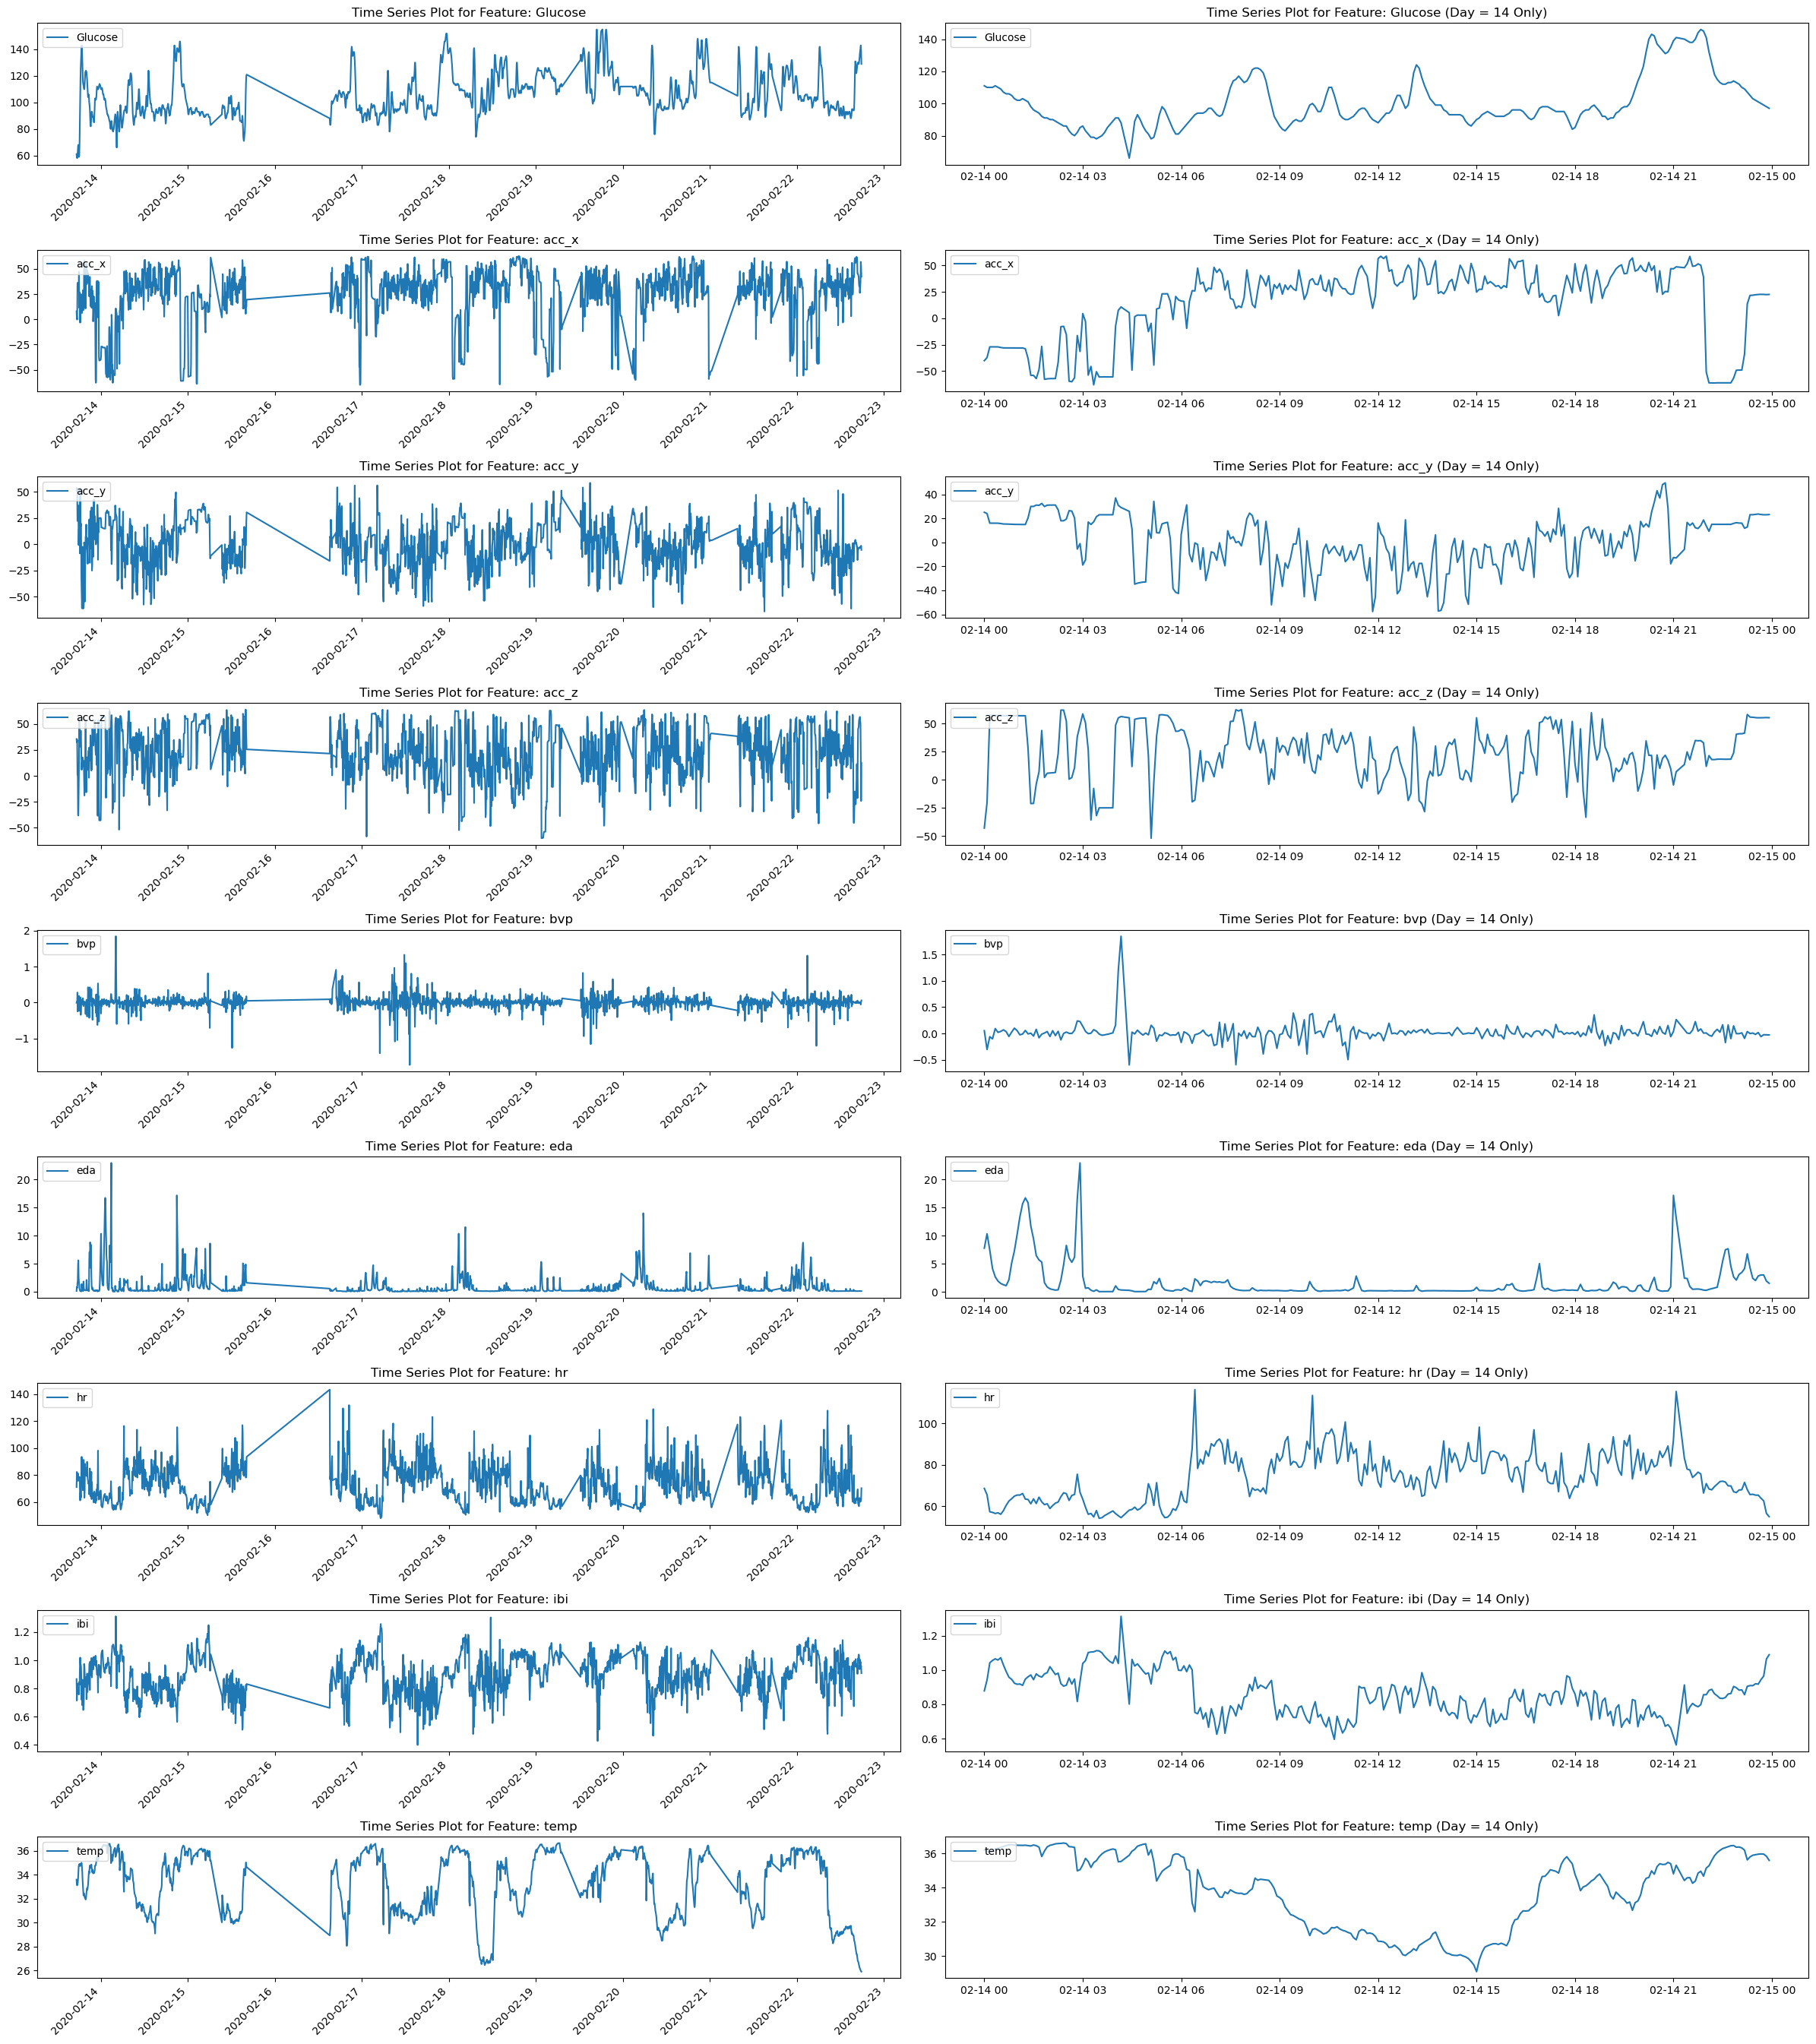

In [170]:
# Drop the rows where there are missing values
df_resampled_removed_na = df_resampled.dropna()

fig, ax = plt.subplots(len(df_resampled_removed_na.columns), 2, figsize=(24, 3 * len(df_resampled_removed_na.columns)))

# Loop over each feature
for i, col in enumerate(df_resampled_removed_na.columns):
    # First plot: All data
    ax[i, 0].plot(df_resampled_removed_na.index, df_resampled_removed_na[col], label=col)

    # Rotate x-axis labels
    labels = ax[i, 0].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='right')

    ax[i, 0].set_title(f'Time Series Plot for Feature: {col}')
    ax[i, 0].legend(loc='upper left')

    # Second plot: Specific day (day = 14)
    selected_rows = df_resampled_removed_na[df_resampled_removed_na.index.day == 14]
    ax[i, 1].plot(selected_rows.index, selected_rows[col], label=col)

    ax[i, 1].set_title(f'Time Series Plot for Feature: {col} (Day = 14 Only)')
    ax[i, 1].legend(loc='upper left')

plt.tight_layout()
plt.show()


In [171]:
df_resampled_removed_na.head()

,Glucose,acc_x,acc_y,acc_z,bvp,eda,hr,ibi,temp
datetime,,,,,,,,,
2020-02-13 17:20:00,61.0,7.889540,51.477413,35.633350,-0.006784,0.136798,71.038800,0.866618,33.603217
2020-02-13 17:25:00,59.0,1.224760,53.671753,32.398989,0.022251,0.839213,82.318333,0.713904,33.192809
2020-02-13 17:30:00,58.0,-0.286104,53.323901,34.964831,0.004121,0.646459,75.429167,0.837369,33.122060
2020-02-13 17:35:00,59.0,34.088833,22.262961,1.190601,0.279484,1.547808,75.973400,0.777253,33.248562
2020-02-13 17:40:00,63.0,36.340576,26.800707,2.861546,-0.249039,1.853783,77.138967,0.808537,33.313278


#Questions: 
1. Should I impute Glucose values to be from every 5 min to ever 1 min? IMO yes because it looks continuous without too much spiking 
2. After imputing I can have every 1 min interval for all data
3. From there I can have 1, 3, 5, 10 min moving averages for each feature
4. Also add norm, and hourse away from midnight

In [172]:
# Feature Engineering: 
- Norm x+y+z
- Mean activity previous 1, 5, 12 hours
- minutes from midnight, 8am, 12pm, 6pm (eating hours?)
- Incoporate food log for additional features (calorie, total carb, fiber, sugar, protein, fat)

SyntaxError: invalid decimal literal (761152503.py, line 4)

In [ ]:
# Questions for Schnuel
# 1.  How to work with different time intervals and start times
# 2.  How to deal with outliers of 'bvp' and 'eda'